In [177]:
import numpy as np
from numpy import genfromtxt
# from numpy import linalg as LA
import scipy.linalg as la
import scipy.spatial as ss
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
%matplotlib inline

import timeit

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex
import pattrex.kdTreeCK as kd_rex
import pattrex.KNearestNeighbor as knn_rex


from pattrex.demo_helper import read_whdata

[ 17  29  32  39  40  50  57  65 114 181 183 192 197 199]
[  7  12  21  65  81  97 106 126 127 152]
[65]


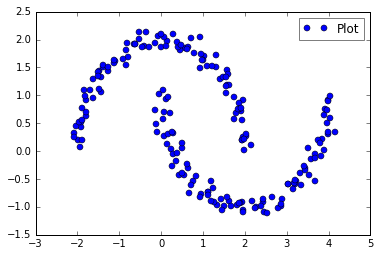

In [251]:
# dt = np.dtype([('w', np.float), ('h', np.float), ('g', 'S1')])  # g is byte-string

my_data = genfromtxt('data/data-clustering-2.csv', delimiter=',')
# print(my_data)
x = my_data[0,:]
y = my_data[1,:]

a=np.where(my_data[0,:]>1.9)
a2=np.where(my_data[0,:]<2.1)
ai = np.intersect1d(a,a2)
print(ai)
b =np.where(my_data[1,:]>-0.1)
b2 =np.where(my_data[1,:]<0.1)
bi = np.intersect1d(b,b2)
print(bi)
# (1.97295076156269,0.0158050839669905)
c = np.intersect1d(ai,bi)
print(c)
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

plt_rex.plot2d(my_data, colwise_data=True, hatch='bo', 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="Plot")

In [275]:
def SimilarityMatrix(X, beta):
    SimMat = np.zeros(shape=(X.shape[1],X.shape[1]))
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
#             SimMat[i][j]=np.exp(-beta*np.sum(np.square(X[:,i]-X[:,j])))
            SimMat[i][j]=np.exp(-beta*ssd.euclidean(X[:,i],X[:,j])**2)
    return SimMat

In [276]:
def DiagonalMatrix(SimMat):
    DiaMat = np.zeros(shape=(SimMat.shape[0],SimMat.shape[1]))
    for i in range(SimMat.shape[0]):
        for j in range(SimMat.shape[1]):
            if i == j:
                DiaMat[i][j]=np.sum(SimMat[i,j:SimMat.shape[1]-1])
    return DiaMat

In [277]:
def LaplacianMatrix(X, beta):
    SimMat = SimilarityMatrix(X, beta)
    DiaMat = DiagonalMatrix(SimMat)
    LapMat = np.subtract(DiaMat, SimMat)
    return LapMat

In [278]:
SMat = SimilarityMatrix(my_data,1)
print(SMat)
# DMat = DiagonalMatrix(SMat)
# print("S",SMat[5,:])
# print("Sum(S)",np.sum(SMat[:,5]))
# print("Sum(S)",np.sum(SMat[5,5:19]))

# print(DMat)

[[  1.00000000e+00   4.10837683e-05   2.94061288e-10 ...,   6.46363649e-05
    1.07052280e-06   4.41310387e-04]
 [  4.10837683e-05   1.00000000e+00   4.20428423e-05 ...,   1.91404905e-01
    6.90596482e-01   5.44464071e-02]
 [  2.94061288e-10   4.20428423e-05   1.00000000e+00 ...,   1.72907747e-02
    2.98460402e-04   1.77895761e-02]
 ..., 
 [  6.46363649e-05   1.91404905e-01   1.72907747e-02 ...,   1.00000000e+00
    2.09570626e-01   7.32575627e-01]
 [  1.07052280e-06   6.90596482e-01   2.98460402e-04 ...,   2.09570626e-01
    1.00000000e+00   4.17642640e-02]
 [  4.41310387e-04   5.44464071e-02   1.77895761e-02 ...,   7.32575627e-01
    4.17642640e-02   1.00000000e+00]]


4.1
4.199999999999999
4.299999999999999
4.399999999999999
4.499999999999998
4.599999999999998
4.6999999999999975
4.799999999999997
4.899999999999997
4.9999999999999964
5.099999999999996


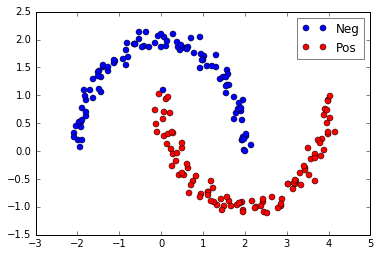

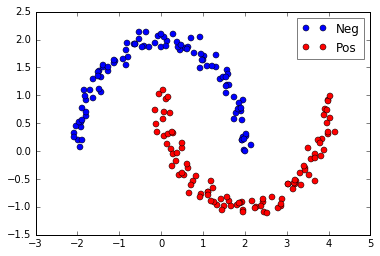

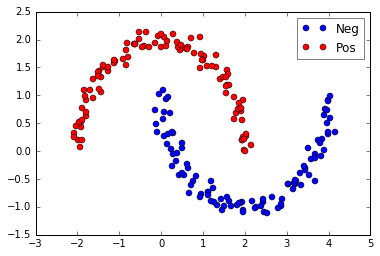

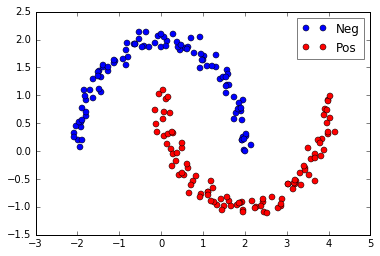

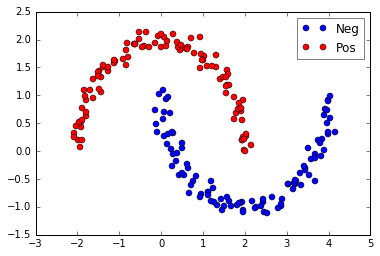

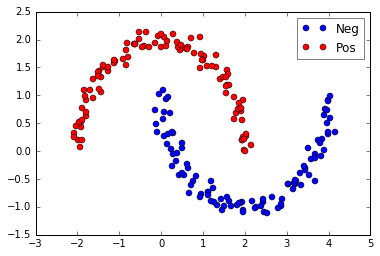

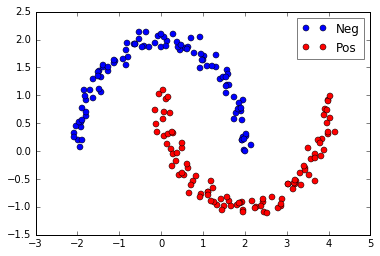

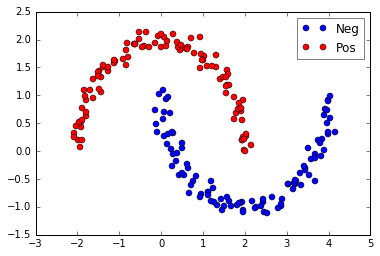

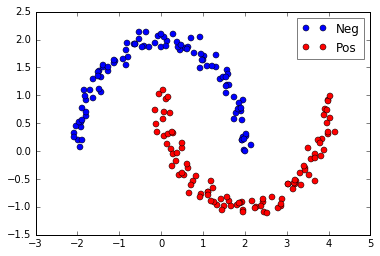

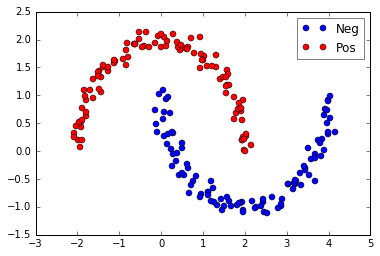

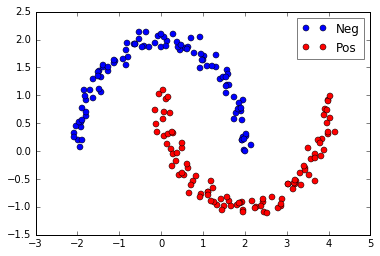

In [292]:
i=4
while i<5:
    LMat = LaplacianMatrix(my_data,i)
    i+=0.1
    # print(LMat)
    l, ur = la.eig(LMat, right=True)

    index=np.argsort(l)
#     print(ur[:,index[1]])
#     print(ur[:,index[1]][65])

    u_idx_pos = np.where(np.sign(ur[:,index[1]])==1)
    u_idx_neg = np.where(np.sign(ur[:,index[1]])==-1)
#     print("len",len(u_idx_neg[0]))
#     print("Neg",u_idx_neg[0])
#     print("len",len(u_idx_pos[0]))
#     print("Pos",u_idx_pos[0])
    fig = plt.figure()
    axs = fig.add_subplot(111)
    print(i)
    plt_rex.plot2d(my_data[:,u_idx_neg[0]], colwise_data=True, hatch='bo', 
                  show=False, axs=axs, set_aspect_equal=False, plotlabel="Neg")
    plt_rex.plot2d(my_data[:,u_idx_pos[0]], colwise_data=True, hatch='ro', 
                  show=False, axs=axs, set_aspect_equal=False, plotlabel="Pos")
